# Analyse autour des comptes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
base_path = "C:\\Users\\ACER\\Desktop\\UTC\\SY09\\PROJET\\sy09_russian-troll-tweets"

In [13]:
original_data=pd.read_csv(os.path.join(base_path, "Data\combined_csv.csv"))

In [14]:
len(original_data)

2946207

In [15]:
original_data.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


## Timeline des tweets

In [16]:
unique_dates = pd.to_datetime(original_data["publish_date"])

In [17]:
unique_dates = unique_dates.to_frame()

In [18]:
unique_dates["just_dates"] = unique_dates["publish_date"].dt.date

In [ ]:
tweet_count = unique_dates["just_dates"].value_counts().to_frame()

In [ ]:
tweet_count = tweet_count.reset_index()
tweet_count.columns = ['date', 'n_tweets']
tweet_count

<AxesSubplot:xlabel='date', ylabel='n_tweets'>

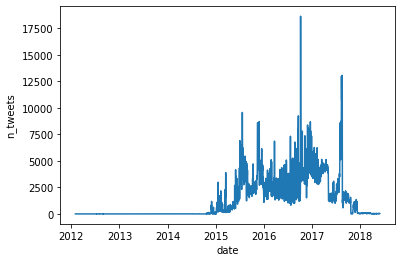

In [67]:
sns.lineplot(data=tweet_count, x='date',y='n_tweets')

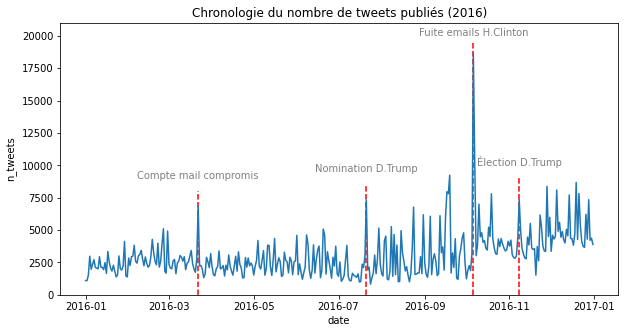

In [47]:
mask = pd.to_datetime(tweet_count["date"]).dt.year == 2016
tweet_count_2016 = tweet_count.loc[mask]
# tweet_count_2016

plt.figure(figsize=(10, 5))
plt.title(f"Chronologie du nombre de tweets publiés (2016)")
style = dict(size=10, color='gray')
plt.ylim(0, 21000)

plt.text(pd.to_datetime("2016-11-8"), 10000, "Élection D.Trump", ha='center', **style)
plt.axvline(x=pd.to_datetime("2016-11-08"), ymax = 9000/21000, color='r', linestyle='--')

plt.text(pd.to_datetime("2016-10-6"), 20000, "Fuite emails H.Clinton", ha='center', **style)
plt.axvline(x=pd.to_datetime("2016-10-6"), ymax = 19500/21000, color='r', linestyle='--')

plt.text(pd.to_datetime("2016-07-21"), 9500, "Nomination D.Trump", ha='center', **style)
plt.axvline(x=pd.to_datetime("2016-07-21"), ymax = 8500/21000, color='r', linestyle='--')

plt.text(pd.to_datetime("2016-03-22"), 9000, "Compte mail compromis", ha='center', **style)
plt.axvline(x=pd.to_datetime("2016-03-22"), ymax = 8000/21000, color='r', linestyle='--')


sns.lineplot(data=tweet_count_2016, x='date', y='n_tweets')
plt.savefig(os.path.join(base_path, "figures", "2016_tweets.png"))


In [ ]:
def calculate_y_pos(dataset, date)

## Analyse autour des catégories

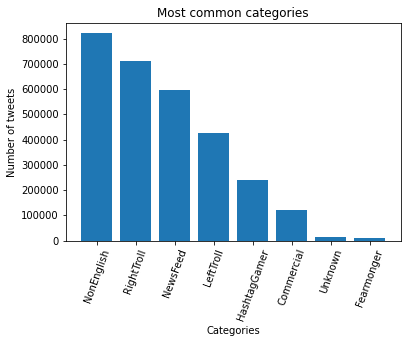

In [5]:
categories_counts = original_data["account_category"].value_counts()
plt.bar(x=categories_counts.index, height=categories_counts.values)
plt.xticks(rotation=70)
plt.title(f"Most common categories")
plt.xlabel("Categories")
plt.ylabel("Number of tweets")
plt.show()

## Analyse autour des comptes : tweets publiées

In [6]:
# Rank authors by number of tweets
n = original_data["author"].value_counts().to_frame()
n = n.reset_index()
n.columns = ["author", "n_tweets"]
n

,author,n_tweets
0,EXQUOTE,59174
1,SCREAMYMONKEY,44001
2,AMELIEBALDWIN,35261
3,WORLDNEWSPOLI,35155
4,TODAYPITTSBURGH,33602
...,...,...
2838,PRIBYSHIN,1
2839,HEREANDTHERE_,1
2840,AAATEST1234,1
2841,HUSEINALJABBER,1


In [7]:
# get infos about these accounts : region and account_category
top_accounts = pd.merge(n, original_data, left_on = 'author', right_on = 'author', how='inner')[["n_tweets", "author", "region", "account_category"]].drop_duplicates(subset=["author"]).reset_index(drop=True)

In [8]:
top_accounts

,n_tweets,author,region,account_category
0,59174,EXQUOTE,United States,Commercial
1,44001,SCREAMYMONKEY,United States,NewsFeed
2,35261,AMELIEBALDWIN,United States,RightTroll
3,35155,WORLDNEWSPOLI,Unknown,RightTroll
4,33602,TODAYPITTSBURGH,United States,NewsFeed
...,...,...,...,...
2838,1,PRIBYSHIN,Russian Federation,Unknown
2839,1,HEREANDTHERE_,United States,Unknown
2840,1,AAATEST1234,Unknown,NonEnglish
2841,1,HUSEINALJABBER,United States,Unknown


In [9]:
top_accounts["n_tweets"].describe()

count     2843.000000
mean      1036.302146
std       3135.230113
min          1.000000
25%         30.000000
50%        152.000000
75%        567.000000
max      59174.000000
Name: n_tweets, dtype: float64

<AxesSubplot:xlabel='n_tweets', ylabel='Proportion'>

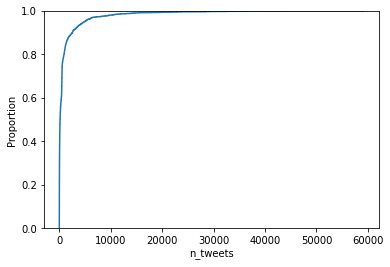

In [10]:
sns.ecdfplot(top_accounts, x="n_tweets")

<AxesSubplot:xlabel='n_tweets', ylabel='Proportion'>

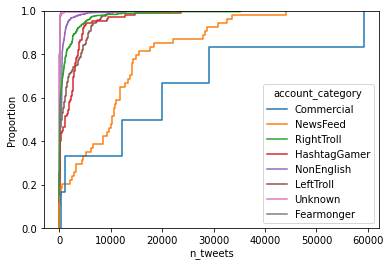

In [11]:
sns.ecdfplot(top_accounts, x="n_tweets", hue="account_category")

## Analyse autour des comptes : following / followers

In [12]:
unique_accounts = original_data.drop_duplicates(["author"])[["author", "account_category"]]

In [13]:
# on récupère la valeur maximale de followers et following pour chacun des comptes
# unique_accounts["max_followers"] = unique_accounts.apply(lambda row : original_data.loc[original_data["author"] == row["author"]]["followers"].max(), axis = 1)
unique_accounts['max_followers'] = original_data.groupby(["author"])["followers"].transform(max)
unique_accounts['max_following'] = original_data.groupby(["author"])["following"].transform(max)
unique_accounts = unique_accounts.reset_index(drop="True")
unique_accounts_4 = unique_accounts.loc[unique_accounts["account_category"].isin(["NewsFeed", "LeftTroll", "NonEnglish", "RightTroll"])]

In [14]:
unique_accounts_4

,author,account_category,max_followers,max_following
0,10_GOP,RightTroll,10465,1074
1,1488REASONS,NonEnglish,6590,6393
3,1ERIK_LEE,RightTroll,74,239
4,1LORENAFAVA1,NonEnglish,103,417
5,2NDHALFONION,RightTroll,1,22
...,...,...,...,...
2837,PLUSHEVYEA,NonEnglish,194,1285
2838,POLICESTATEME,LeftTroll,1513,5000
2840,POLIPROPILENOVA,NonEnglish,235,760
2841,POLITERUSSIA,NonEnglish,12339,5825


<AxesSubplot:xlabel='max_followers', ylabel='max_following'>

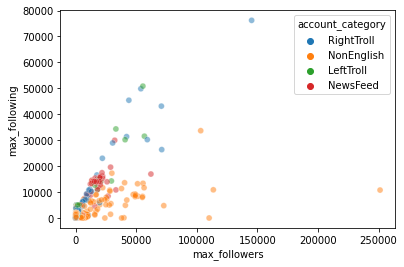

In [15]:
sns.scatterplot(data=unique_accounts_4, x="max_followers", y="max_following", hue="account_category", alpha=0.5)

(0.0, 20000.0)

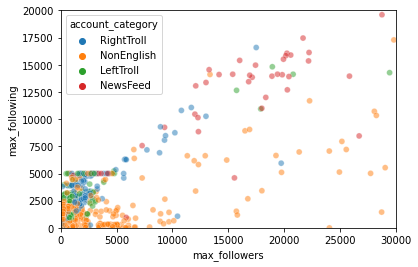

In [16]:
sns.scatterplot(data=unique_accounts_4, x="max_followers", y="max_following", hue="account_category", alpha=0.5)
plt.xlim(0, 30000)
plt.ylim(0, 20000)

(0.0, 6000.0)

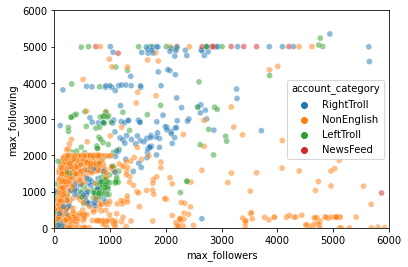

In [17]:
sns.scatterplot(data=unique_accounts_4, x="max_followers", y="max_following", hue="account_category", alpha=0.5)
plt.xlim(0, 6000)
plt.ylim(0, 6000)

Les motifs de ligne à y=2000 et y=5000 sont dues aux limites de followings établis par Tweeter

https://twitter.com/TwitterSupport/status/659082270737719296

Cependant, il semble possible de dépasser cette limite sous la condition d'avoir un ratio follower/following supérieur à 1

(0.0, 20000.0)

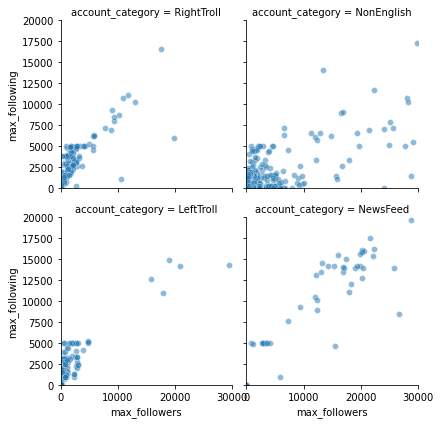

In [18]:
unique_accounts_4 = unique_accounts.loc[unique_accounts["account_category"].isin(["NewsFeed", "LeftTroll", "NonEnglish", "RightTroll"])]
g = sns.FacetGrid(unique_accounts_4, col="account_category", col_wrap=2)
g.map(sns.scatterplot, "max_followers", "max_following", alpha=0.5)
plt.xlim(0, 30000)
plt.ylim(0, 20000)